# FIFA 18: what makes a complete player?

In [28]:
from IPython.display import Image

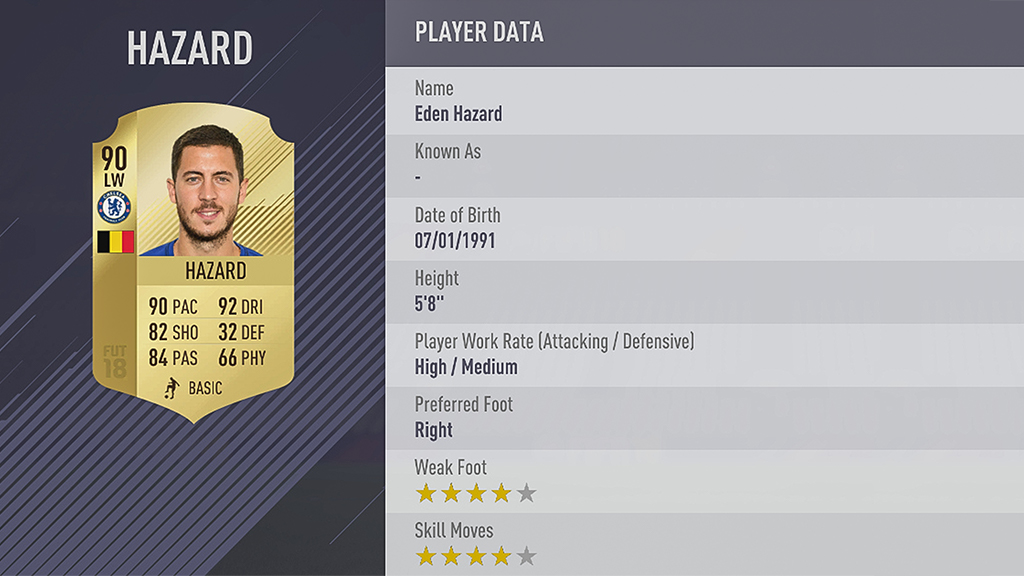

In [29]:
Image('sample_card.jpg',width=450)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import vq,kmeans,whiten
from termcolor import colored

In [31]:
fifa=pd.read_csv('fifa_18_sample_data.csv')
fifa

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [32]:
fifa=fifa[['ID','name','pac','sho','pas','dri','def','phy']]
fifa.head()

,ID,name,pac,sho,pas,dri,def,phy
0,20801,Cristiano Ronaldo,90,93,82,90,33,80
1,158023,L. Messi,89,90,86,96,26,61
2,190871,Neymar,92,84,79,95,30,60
3,176580,L. Suárez,82,90,79,87,42,81
4,167495,M. Neuer,91,90,95,89,60,91


In [33]:
fifa['scaled_pac']=whiten(fifa['pac'])
fifa['scaled_sho']=whiten(fifa['sho'])
fifa['scaled_pas']=whiten(fifa['pas'])
fifa['scaled_dri']=whiten(fifa['dri'])
fifa['scaled_def']=whiten(fifa['def'])
fifa['scaled_phy']=whiten(fifa['phy'])

<ipython-input-33-1ea6f3ec75f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['scaled_pac']=whiten(fifa['pac'])
<ipython-input-33-1ea6f3ec75f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['scaled_sho']=whiten(fifa['sho'])
<ipython-input-33-1ea6f3ec75f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [34]:
fifa

,ID,name,pac,sho,pas,dri,def,phy,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
0,20801,Cristiano Ronaldo,90,93,82,90,33,80,7.743447,6.789714,9.291969,9.534738,1.649258,9.374085
1,158023,L. Messi,89,90,86,96,26,61,7.657409,6.570691,9.745236,10.170387,1.299416,7.147740
2,190871,Neymar,92,84,79,95,30,60,7.915524,6.132645,8.952019,10.064446,1.499326,7.030564
3,176580,L. Suárez,82,90,79,87,42,81,7.055141,6.570691,8.952019,9.216914,2.099056,9.491261
4,167495,M. Neuer,91,90,95,89,60,91,7.829485,6.570691,10.765086,9.428797,2.998652,10.663022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,83,61,69,72,75,71,7.141179,4.453469,7.818852,7.627791,3.748315,8.319501
996,160087,L. Dalsaro,72,62,74,69,75,81,6.194758,4.526476,8.385435,7.309966,3.748315,9.491261
997,31831,K. Källström,36,70,82,72,63,73,3.097379,5.110538,9.291969,7.627791,3.148584,8.553853
998,204120,T. Vaclík,79,75,74,80,35,77,6.797026,5.475576,8.385435,8.475323,1.749214,9.022557


In [35]:
scaled_features=['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']

# Deciding the num_of_clusters based on Elbow_point


In [36]:
distortions=[]
num_clusters=range(1,7)
for i in num_clusters:
    cluster_centers,distortion= kmeans(fifa[scaled_features],i)
    distortions.append(distortion)

In [38]:
elbow_point=pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

<AxesSubplot:xlabel='num_clusters', ylabel='distortions'>

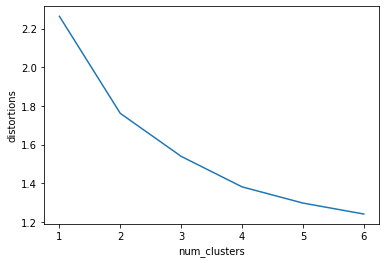

In [39]:
sns.lineplot(x='num_clusters',y='distortions',data=elbow_point)

In [40]:
# Creating centroids with kmeans for 2 clusters
cluster_centers,_= kmeans(fifa[scaled_features],2)

In [41]:
# Assign cluster labels and print cluster centers
fifa['cluster_labels'],_=vq(fifa[scaled_features],cluster_centers)
fifa

<ipython-input-41-332ae94e5add>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa['cluster_labels'],_=vq(fifa[scaled_features],cluster_centers)


,ID,name,pac,sho,pas,dri,def,phy,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy,cluster_labels
0,20801,Cristiano Ronaldo,90,93,82,90,33,80,7.743447,6.789714,9.291969,9.534738,1.649258,9.374085,0
1,158023,L. Messi,89,90,86,96,26,61,7.657409,6.570691,9.745236,10.170387,1.299416,7.147740,0
2,190871,Neymar,92,84,79,95,30,60,7.915524,6.132645,8.952019,10.064446,1.499326,7.030564,0
3,176580,L. Suárez,82,90,79,87,42,81,7.055141,6.570691,8.952019,9.216914,2.099056,9.491261,0
4,167495,M. Neuer,91,90,95,89,60,91,7.829485,6.570691,10.765086,9.428797,2.998652,10.663022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,83,61,69,72,75,71,7.141179,4.453469,7.818852,7.627791,3.748315,8.319501,0
996,160087,L. Dalsaro,72,62,74,69,75,81,6.194758,4.526476,8.385435,7.309966,3.748315,9.491261,1
997,31831,K. Källström,36,70,82,72,63,73,3.097379,5.110538,9.291969,7.627791,3.148584,8.553853,1
998,204120,T. Vaclík,79,75,74,80,35,77,6.797026,5.475576,8.385435,8.475323,1.749214,9.022557,0


In [42]:
fifa.groupby('cluster_labels')[scaled_features].mean()

,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
cluster_labels,,,,,,
0,6.684477,5.433653,8.456695,8.516572,2.496427,8.332794
1,5.461627,3.673869,7.180554,6.775813,3.966748,9.206925


<Figure size 2000x1000 with 0 Axes>

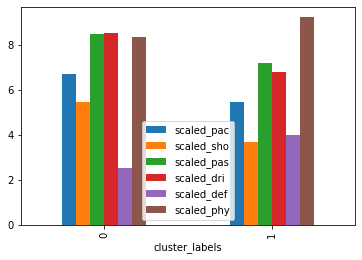

In [43]:
# Plot cluster centers to visualize clusters
plt.figure(figsize=(10,5),dpi=200)
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True,kind='bar')
plt.legend(loc = 0 )

In [52]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster,colored( fifa[fifa['cluster_labels'] == cluster]['name'].values[:5],'green',attrs=['bold']))

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


# Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders.                                        Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.